# evaluate 꿀팁 

acc, loss = model.evaluate(X_test, y_test, verbose = 2) 

print('정확도:{:5.2f}%'.format(acc))
print('로스:{:5.2f}%'.format(loss))

출력 예쁘게 나옴 



# Sequential API를 이용한 MLP

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras 

### Fashion Dataset

In [ ]:
### 데이터 적재 
# fashion dataset : 60000 x 28 x 28 크기 
fashion_mnist = keras.datasets.fashion_mnist 

In [113]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [114]:
X_train_full.shape

(60000, 28, 28)

In [115]:
X_train_full.dtype

dtype('uint8')

In [116]:
y_train.shape

(55000,)

##### 경사 하강법으로 신경망 훈련, 입력 특성의 스케일 조정 필요 

In [44]:
# 훈련세트와 테스트 세트 분리 
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_valid = y_train_full[:5000] / 255.0
y_train = y_train_full[5000:] / 255.0
X_test = X_test / 255.0 

##### 패션 아이템을 나타내기 위한 클래스 설정

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

##### Sequential API 사용 모델 만들기
$$ 은닉층 연산 : h_{W,b}(X) = \theta{(XW + b)} $$
$$ W : 편향 뉴런을 제외한 모든 연결 가중치 $$
$$ 편향 벡터 b : 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치 $$

###### Sequential 객체 생성 1. 

In [ ]:
# Sequential 객체  : 순서대로 연결된 층을 일렬로 쌓아서 구성 

# Sequential 객체 생성 
model = keras.models.Sequential() 


# 입력 레이어 
    # Flatteen
    # 1. 입력 이미지를 1D 배열로 변환 
    # 2. X입력 -> X = X.reshape(-1, 1) 연산 
# 전처리 
model.add(keras.layers.Flatten(input_shape = [ 28, 28] )) 

# 300개를 가진 Dnese은닉층, relu 활성화함수 사용 
# Dense마다 각자 가중치 행렬 관리 
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))

# 배타적 클래스 분류 : 소프트 맥스 
model.add(keras.layers.Dense(10, activation = 'softmax'))

###### Sequential 객체 생성 2

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    # 출력층 
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

첫번째 층 : 784 * 300개 연결 가중치 + 300개의 편향 = 235500
-> 많은 파라미터 : 과대적합의 위험 

##### 모델 컴파일 

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

###### 모델 훈련과 평가 
➤ 훈련 정확도와, 검증 정확도의 차이로 과대 적합 확인 가능 

In [ ]:
history = model.fit(X_train, y_train,   # 학습 데이터
                    epochs = 2,        # 에포크  
                    validation_data = (X_valid, y_valid))
                                        # 검증 세트 : 각 에포크마다, 손실 및 지표 확인  

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위를 [0-1] 사이로 설정합니다. 
plt.show()

### California Housing 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras 

In [124]:
housing = fetch_california_housing()

In [125]:
print(housing.data)
housing.data.shape # 8개의 컬럼, 20640개의 열 
# 20640 x 8 행렬 

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


(20640, 8)

In [126]:
# 행렬의 행, 열 변환되서 들어옴 

# 테스트 셋, 사용할 세트 분리
X_train_full, X_test, y_train_full, y_test = \
        train_test_split(housing.data, housing.target)

# 학습 셋, 검증 셋 분리
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train_full, y_train_full)

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [128]:
X_train.shape[1:]

(8,)

In [129]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
    # 8 개의 칼럼의 데이터들이 입력값으로 들어옴 
    # a : 1, 2, 3,.....
    # b : 4, 5, 6,.....
    # c : 7, 8, 9,.....

model.compile(loss = 'mean_squared_error', 
              optimizer = 'sgd',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, 
                   validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.8452 - accuracy: 0.0031 - val_loss: 1.0259 - val_accuracy: 0.0034
Epoch 2/20
11610/11610 [==============================] - 0s 41us/sample - loss: 1.4170 - accuracy: 0.0031 - val_loss: 0.4067 - val_accuracy: 0.0034
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4136 - accuracy: 0.0030 - val_loss: 0.3794 - val_accuracy: 0.0034
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3933 - accuracy: 0.0030 - val_loss: 0.3797 - val_accuracy: 0.0034
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3810 - accuracy: 0.0031 - val_loss: 0.3586 - val_accuracy: 0.0034
Epoch 6/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3760 - accuracy: 0.0031 - val_loss: 0.3580 - val_accuracy: 0.0034
Epoch 7/20
11610/11610 [==============================] -

In [130]:
acc, loss = model.evaluate(X_test, y_test, verbose = 2) 

print('정확도:{:5.2f}%'.format(acc))
print('로스:{:5.2f}%'.format(loss))

# X_new = X_test[:3]
# y_pred = model.predict(X_new)

5160/1 - 0s - loss: 0.4200 - accuracy: 0.0025
정확도: 0.34%
로스: 0.00%


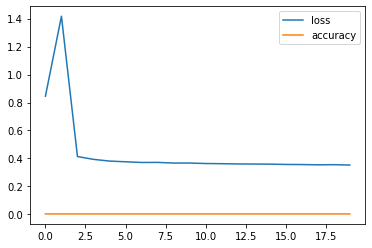

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'], loc = 'upper right')
plt.show()

### 10.2.함수형 API 

###### Deep and Wide 신경망 1 (  짧은 경로, 긴 경로 동시 학습 예제 )

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras

In [58]:
housing = fetch_california_housing()

In [59]:
# 행렬의 행, 열 변환되서 들어옴 

# 테스트 셋, 사용할 세트 분리
X_train_full, X_test, y_train_full, y_test = \
        train_test_split(housing.data, housing.target)

# 학습 셋, 검증 셋 분리
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train_full, y_train_full)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

이 구조를 사용하면 신경망이 (깊게 쌓은 층을 사용한) 복잡한 패턴과 (짧은 경로를 사용한) 간단한 규칙을 모두 학습
<img src = './img/wide_deep1.jpg' >

In [61]:
# 입력 정의 
input_ = keras.layers.Input(shape = X_train.shape[1:])

# 입력과 함께 호출 -> 함수형 API 
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)

# 첫번째 출력 전달 
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

# 주어진 입력으로 바로 호출 
concat = keras.layers.Concatenate()([input_, hidden1])

# 하나의 뉴런과 활성화 함수가 없는 층을 통해, 주어진 입력 바로 호출 
output = keras.layers.Dense(1)(concat)

## 모델 빌딩 
# 사용할 입력과 출력을 지정, model 생성 
model = keras.Model(inputs = [input_], outputs = [output])

In [62]:
model.compile(loss = 'mse',
             optimizer = keras.optimizers.SGD(lr= 1e-3))

In [63]:
history = model.fit(X_train, y_train,
                   epochs = 2,
                   validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 102us/sample - loss: 1.7212 - val_loss: 0.8720
Epoch 2/2
11610/11610 [==============================] - 1s 73us/sample - loss: 0.8393 - val_loss: 0.7459


###### Deep and Wide 신경망 2 (  짧은 경로, 긴 경로 서로 다른 모델 학습 예제 )

만약 일부 특성은 짧은 경로로 전달하고 다른 특성들은 (중복될 수 있습니다) 깊은 경로로 전달  
5개 특성(특성 인덱스 0에서 4번까지)을 짧은 경로로 보내고 6개 특성(특성 인덱스 2에서 7번까지)은 깊은 경로로 보낸다  
이렇게 모델이 복잡해지면 적어도 가장 중요한 층에는 이 름을 붙이는 것이 좋습니다
<img src = './img/wide_deep2.jpg' >

In [64]:
'''
A - - - - - - - - - concat - output 
B - 은닉1 - 은닉2 /
'''
input_A = keras.layers.Input(shape=[5], name = 'wide_input')

input_B = keras.layers.Input(shape=[6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name='output')(concat) # 단순 출력층 ㄷ

model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [65]:
X_train.shape

(11610, 8)

In [66]:
model.compile(loss = 'mse',
             optimizer = keras.optimizers.SGD(lr= 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] 

X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [67]:
history = model.fit((X_train_A, X_train_B), y_train,
                   epochs = 2,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 150us/sample - loss: 2.6249 - val_loss: 1.1077
Epoch 2/2
11610/11610 [==============================] - 1s 64us/sample - loss: 0.9204 - val_loss: 0.7678


###### verbose = 2, evaluate 출력 줄이기

In [68]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test, verbose = 2)
print('mse : ', mse_test)
y_pred = model.predict((X_new_A, X_new_B), verbose = 2)
print(y_pred)

5160/1 - 0s - loss: 0.5756
mse :  0.8062218585217646
3/1 - 0s
[[1.5319521]
 [2.2952976]
 [1.9162667]]


### 10.2.6 콜백 사용하기  :  checkpoint / earlystopping / tensorboard

###### 사용 데이터 로드

In [99]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [100]:
# 훈련세트와 테스트 세트 분리 
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0

y_valid = y_train_full[:5000] / 255.0
y_train = y_train_full[5000:] / 255.0
X_test = X_test / 255.0 

In [103]:
print(X_train.shape, y_train.shape)

(55000, 28, 28) (55000,)


###### 모델 저장과 복원  : 11장에서 재사용

In [109]:
import matplotlib.pyplot as plt

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(200, activation = 'relu'),
    
    keras.layers.Dense(1, activation = 'tanh')
])

model.compile(optimizer='rmsprop',
              loss = 'mse',
              metrics = ['accuracy'])

In [110]:
model.fit(X_train, y_train,
         epochs = 3)

Train on 55000 samples
Epoch 1/3
55000/55000 [==============================] - 11s 196us/sample - loss: 0.0077 - accuracy: 0.0998
Epoch 2/3
55000/55000 [==============================] - 9s 162us/sample - loss: 3.1311e-05 - accuracy: 0.1008
Epoch 3/3
55000/55000 [==============================] - 9s 161us/sample - loss: 2.5959e-05 - accuracy: 0.1008


In [111]:
# 11장에서 재사용 
model.save('my_keras_model.h5') 
deep_wide_model = keras.models.load_model('my_keras_model.h5')
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_69 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 201       
Total params: 295,901
Trainable params: 295,901
Non-trainable params: 0
_________________________________________________________________


###### checkpoint
- save_best_only : 옵션 통해 켜놓고 자고 일어나면 제일 좋은 놈이 저장되어 있음

In [89]:
# save_best_only
checkpoint_cb = keras.callbacks.ModelCheckpoint('fashion_best.h5', save_best_only = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('fashion_epochs.h5', save_best_only = False)
 

In [90]:
history = model.fit(X_train, y_train, epochs = 3, 
                    callbacks=[checkpoint_cb])

ValueError: A target array with shape (55000, 1) was passed for an output of shape (None, 10) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

###### earlystopping
- patience = 일정 에포크
    - patience(일정 에포크) 동안 검증 세트에 대한 점수가 오르지 않으면 훈련을 멈춤 
    - 

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)


In [ ]:
history = model.fit((X_train, X_train), 
                    y_train, epochs = 3, 
                    callbacks=[checkpoint_cb])

###### 텐서보드 출력

In [ ]:
my_log_dir = './testing'

In [ ]:
# TensorBoard  
callbacks = [
    tf.keras.callbacks.TensorBoard(
    log_dir = 'my_log_dir',
    histogram_freq = 1,
    embeddings_freq = 1)
]

In [ ]:
model.fit(X_train, y_train,
         epochs = 3,
         validation_data = (X_valid, y_valid),
         callbacks = callbacks )

In [ ]:
!tensorboard --logdir=my_log_dir

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### 모델 사용해 예측 만들기 

In [ ]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
import numpy as np
np.array(class_names)[y_pred]